## import libraries

In [1]:
import nextbike

## read in raw data

In [2]:
dfRaw = nextbike.io.read_file()

## create Index for available bikes per fixed station based on time

In [3]:
dfStationBikeNumber = nextbike.io.preprocessStationData(dfRaw)
dfStationBikeNumber

,datetime,p_bikes,p_number
0,2019-01-20 02:06:00,5,5155
1,2019-01-20 14:16:00,4,5155
2,2019-01-20 00:00:00,5,5173
3,2019-01-20 01:55:00,5,5173
4,2019-01-20 02:06:00,4,5159
...,...,...,...
1561736,2019-12-31 23:59:00,5,5176
1561739,2019-12-31 18:51:00,1,5155
1561740,2019-12-31 21:44:00,3,5155
1561741,2019-12-31 14:30:00,17,5177


In [4]:
dfStationBikeNumber = nextbike.io.createBikeNumberPerStationIndex(dfStationBikeNumber)
dfStationBikeNumber

,5140,5141,5142,5143,5144,5145,5146,5147,5150,5151,...,5168,5169,5171,5172,5173,5174,5175,5176,5177,5178
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,5,2,7,1,3,5,8,2,1,1,...,2,3,2,1,1,3,1,6,18,1
2019-12-31 23:56:00,5,2,7,1,3,5,8,2,1,1,...,2,3,2,1,1,3,1,6,18,1
2019-12-31 23:57:00,5,2,7,1,3,5,8,2,1,1,...,2,3,2,1,1,3,1,6,18,1


## create station data

In [5]:
dfTrips = nextbike.io.preprocessData(dfRaw)
dfTrips

,datetime,b_number,trip,p_lat,b_bike_type,p_name,p_number,p_lng
3,2019-01-20 01:55:00,11169,start,50.795224,15,Südbahnhof,5173,8.763266
4,2019-01-20 02:06:00,11169,end,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
5,2019-01-20 08:15:00,11169,start,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
6,2019-01-20 11:39:00,11169,end,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
7,2019-01-20 11:58:00,11169,start,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
...,...,...,...,...,...,...,...,...
1561731,2019-12-31 22:44:00,11265,end,50.813203,15,Biegenstraße/Volkshochschule,5156,8.775948
1561734,2019-12-31 12:26:00,11080,start,50.824840,15,BIKE 11080,0,8.774508
1561735,2019-12-31 12:42:00,11080,end,50.807063,15,Universitätsstraße/Bibliothek Jura,5176,8.769918
1561738,2019-12-31 18:37:00,11299,start,50.824863,15,BIKE 11299,0,8.774459


In [6]:
dfStations = nextbike.io.createStations(dfTrips)
dfStations

,pName,pLat,pLong
pNumber,,,
0,no fixed station,NaN,NaN
5140,Anatomie,50.816058,8.772242
5141,Ketzerbach/Zwischenhausen,50.813950,8.766160
5142,Friedrichplatz,50.803270,8.764060
5143,Interkulturelle Gaerten/ Am Richtsberg,50.794700,8.772230
5144,Carolinenhaus/Elisabethkirche,50.814655,8.771212
5145,Neue Universitaetsbibliothek,50.813691,8.770734
5146,Cafe Traume/Affoellerwiesen,50.820220,8.771030
5147,Am Schuelerpark,50.812779,8.780602


## create trip data

In [7]:
dfTrips = nextbike.io.createTrips(dfTrips)

Error at lines:
128324
128580
128674
128824
128860
129114
129340
129513
130326
648905
649161
649255
649405
649441
649695
649921
650094
650907
1169486
1169742
1169836
1169986
1170022
1170276
1170502
1170675
1171488


In [8]:
dfTrips

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159
1,11169,2019-01-20 08:15:00,2019-01-20 11:39:00,03:24:00,8.770358,50.804522,8.770358,50.804522,True,15,5159,5159
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150
...,...,...,...,...,...,...,...,...,...,...,...,...
630913,11265,2019-12-31 18:53:00,2019-12-31 19:08:00,00:15:00,8.774454,50.824867,8.759248,50.804725,False,15,0,5178
630914,11265,2019-12-31 22:13:00,2019-12-31 22:22:00,00:09:00,8.759248,50.804725,8.775351,50.808070,False,15,5178,5158
630915,11265,2019-12-31 22:37:00,2019-12-31 22:44:00,00:07:00,8.775351,50.808070,8.775948,50.813203,False,15,5158,5156
630916,11080,2019-12-31 12:26:00,2019-12-31 12:42:00,00:16:00,8.774508,50.824840,8.769918,50.807063,False,15,0,5176


## save files

In [9]:
nextbike.io.save_tripData(dfTrips)

In [10]:
nextbike.io.save_StationBikeNumberData(dfStationBikeNumber)

In [11]:
nextbike.io.save_StationData(dfStations)

## visualize number of bikes per station

In [12]:
m = nextbike.visualization.visualizeNumberOfBikesPerStationMap('2019-08-20 19:00:00', dfStations, dfStationBikeNumber)
m

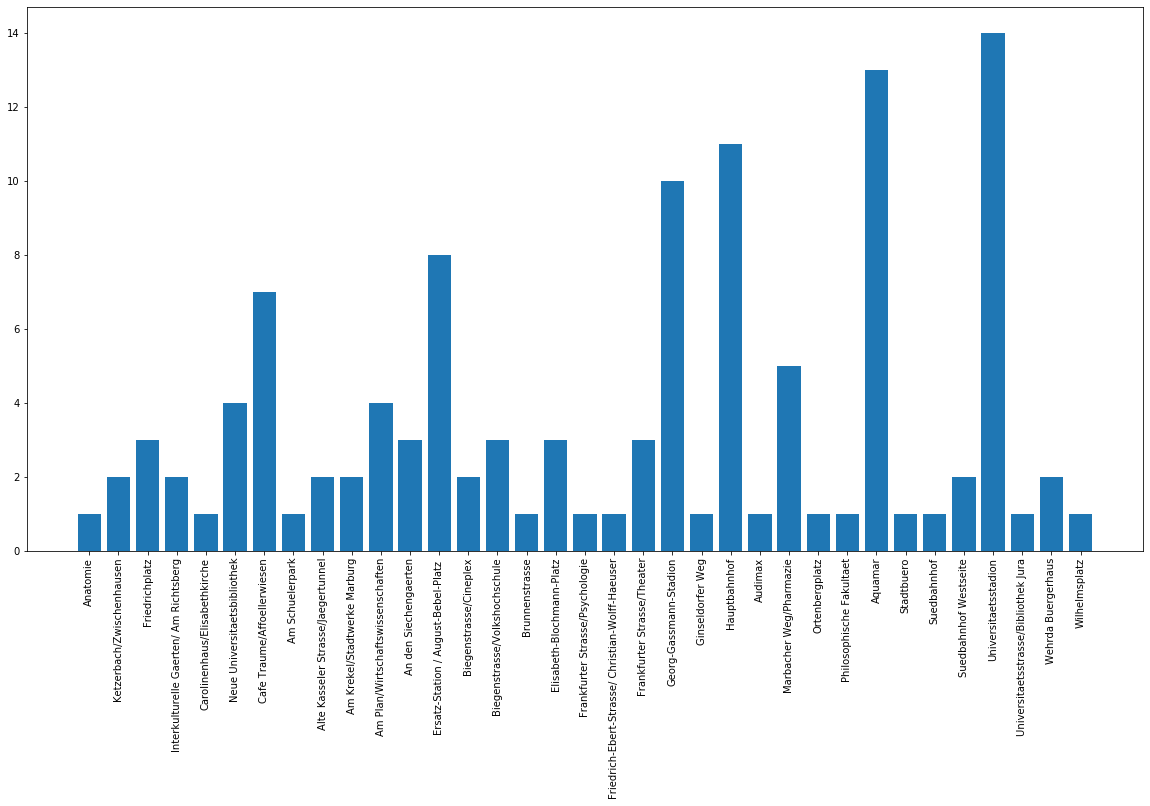

In [13]:
nextbike.visualization.visualizeNumberOfBikesPerStationBarplot('2019-08-20 19:00:00', dfStations, dfStationBikeNumber)